In [32]:
'''

Youssef Nasser Abdelhafeez      20200674

Toka Hamdy Muhammed Saeed       20201048

Menna Mohammed Ibrahim          20201178

Merahan Soliman Mohammed        20200574

Abdelaziz Ashraf Abdelaziz      20200321

'''

'\n\nYoussef Nasser Abdelhafeez      20200674\n\nToka Hamdy Muhammed Saeed       20201048\n\nMenna Mohammed Ibrahim          20201178\n\nMerahan Soliman Mohammed        20200574\n\nAbdelaziz Ashraf Abdelaziz      20200321\n\n'

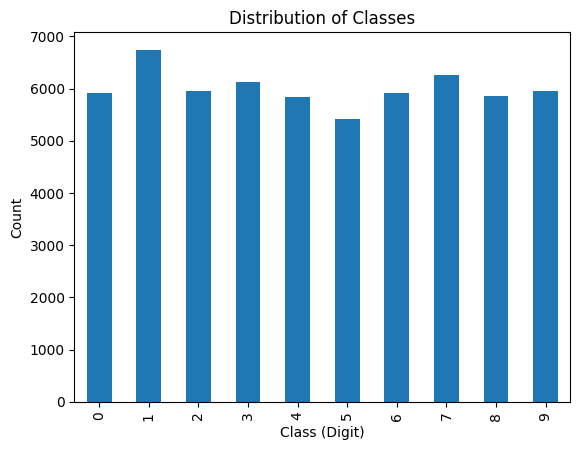

First five rows of the training data:
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
Number of unique classes: 10
Number of features: 784

Missing values in the train data:
label    0
1x1      0
1x2      0


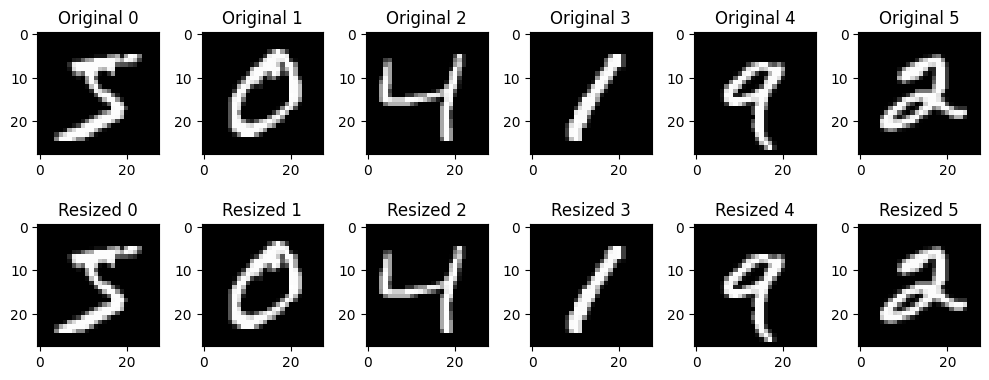

In [33]:
# import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## (a) Data Exploration and preparation:
# Load the dataset and perform initial data exploration.
data_train = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
data_test = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')

# Visualize the distribution of classes (labels)
data_train['label'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class (Digit)')
plt.ylabel('Count')
plt.show()


# Begin by familiarizing yourself with the dataset.
print("First five rows of the training data:")
print(data_train.head())


#  Identify the number of unique classes.
num_classes = data_train['label'].nunique()
print("Number of unique classes:",num_classes)


# Identify the number of features.
num_features = len(data_train.columns) - 1  # Subtract 1 for the label column
print("Number of features:",num_features)


# Check for missing values.
missing_values = data_train.isnull().sum()
print("\nMissing values in the train data:")
print(missing_values)
missing_values1 = data_test.isnull().sum()
print("\nMissing values in the test data:")
print(missing_values1)


# Extract labels and pixel (target and features) values from the training data.
train_labels = data_train['label'].values # Target
train_pixels = data_train.drop('label', axis=1).values # Feauters

test_labels = data_test['label'].values # Target
test_pixels = data_test.drop('label', axis=1).values # Feauters

# Normalize each image by dividing each pixel by 255.
train_pixels_normalized = train_pixels / 255.0
test_pixels_normalized = test_pixels / 255.0

# Resize images to dimensions of 28 by 28.
train_images_resized = np.array([resize(img.reshape(28, 28), (28, 28)) for img in train_pixels_normalized])
test_images_resized = np.array([resize(img.reshape(28, 28), (28, 28)) for img in test_pixels_normalized])

# After resizing, visualize some images to verify the correctness of the reshaping process.
num_images = 6
plt.figure(figsize=(10, 4))

for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.imshow(train_pixels_normalized[i].reshape(28, 28), cmap='gray')
    plt.title(f"Original {i}")

    plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(train_images_resized[i], cmap='gray')
    plt.title(f"Resized {i}")

plt.tight_layout()
plt.show()


# Split the training data (mnist_train) into training and validation sets.
X_train, X_test, y_train, y_test = train_test_split(train_images_resized, train_labels, test_size=0.25, random_state=42)

# reshape data test
test_features = test_images_resized.reshape(test_images_resized.shape[0], -1)

In [34]:
import keras
import seaborn as sns
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential 
from sklearn.metrics import confusion_matrix

# Handling the shape of the data.
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Experiment 1

# Architecture 1
first_model = Sequential()
first_model.add(Dense(units = 512, activation ='relu', input_shape = (784,)))
first_model.add(Dense(units = 256, activation = 'relu'))
first_model.add(Dense(units = 128, activation = 'relu'))
first_model.add(Dense(units = 64, activation = 'relu'))
first_model.add(Dense(units = 10, activation = 'softmax'))
first_model.compile(optimizer = SGD(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
first_model.fit(X_train, y_train,  batch_size = 32, epochs = 10,verbose = 1)
accuracy1 = first_model.evaluate(x = X_test,y = y_test,batch_size = 32)
print("Score for model 1 =",accuracy1[1])

# Architecture 2
second_model = Sequential()
second_model.add(Dense(units = 256, activation = 'relu', input_shape = (784,)))
second_model.add(Dense(units = 64, activation = 'sigmoid'))
second_model.add(Dense(units = 10, activation = 'softmax'))
second_model.compile(optimizer = SGD(0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
second_model.fit(X_train, y_train,  batch_size = 64, epochs = 10,verbose = 1)
accuracy2 = second_model.evaluate(x = X_test,y = y_test,batch_size = 64)
print("Score for model 2 =",accuracy2[1])

# Get the confusion matrix of the best model.
def conf_matrix_ann(model):
    print("ANN Confusion Matrix.")
    # Get predictions from the models
    y_pred = np.argmax(model.predict(X_test), axis=1)
    # Calculate the confusion matrices
    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    # Display the confusion matrix using seaborn
    plt.figure(figsize = (8, 6))
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = range(10), yticklabels = range(10))
    plt.title('Confusion Matrix for the best architecture')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
ann_best_model = Sequential()

if(accuracy1[1] >= accuracy2[1]):
    # Save the best architecture.
    ann_best_model = first_model
else:
    # Save the best architecture.
    ann_best_model = second_model
    
Ann_accuracy = ann_best_model.evaluate(x = X_test,y = y_test,batch_size = 64)
print("Score for best architecture =",Ann_accuracy[1])


Epoch 1/10
1407/1407 [==============================] - 6s 3ms/step - loss: 1.9513 - accuracy: 0.5033
Epoch 2/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.9950 - accuracy: 0.7875
Epoch 3/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5651 - accuracy: 0.8585
Epoch 4/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4400 - accuracy: 0.8813
Epoch 5/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3825 - accuracy: 0.8939
Epoch 6/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3477 - accuracy: 0.9026
Epoch 7/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3226 - accuracy: 0.9096
Epoch 8/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3031 - accuracy: 0.9142
Epoch 9/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2871 - accuracy: 0.9189
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2770 

In [35]:
from sklearn.model_selection import GridSearchCV,cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
 
    
# Split the training data (mnist_train) into training and validation sets.
X_train_flat = train_images_resized.reshape(train_images_resized.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X_train_flat, train_labels, test_size=0.25, random_state=42)
 
# Trying three different values for neighbors.
trials_of_grid={
  'n_neighbors': [3,5,7],
  'weights': ['uniform', 'distance']
}


KNN_Model=KNeighborsClassifier()

# KNN Model using Grid Search 
KNN_Grid_Search=GridSearchCV(KNN_Model,trials_of_grid,cv=5)
KNN_Grid_Search.fit(X_train,y_train)

#finding best parameters for nearst neighbors and weight too
Best_K=KNN_Grid_Search.best_params_
Best_KNN_Model=KNeighborsClassifier(n_neighbors=Best_K['n_neighbors'],weights=Best_K['weights'])

Best_KNN_Model.fit(X_train,y_train)
y_predict=Best_KNN_Model.predict(X_test)

#calculating accuracy
Knn_accuracy=accuracy_score(y_predict,y_test)
print("KNN-Accuracy =", Knn_accuracy)

# Confusion_Matrix
def conf_matrix_knn():
    print("KNN Confusion Matrix.")
    predications_KNN=cross_val_predict(Best_KNN_Model,X_train,y_train,cv=5)
    Confusion_Matrix=confusion_matrix(y_train,predications_KNN)
    # Display_Confusion_Matrix
    cm_fig, cm_ax = plt.subplots(figsize=(10, 10))
    Confusion_Matrix_display=ConfusionMatrixDisplay(Confusion_Matrix)
    Confusion_Matrix_display.plot(ax=cm_ax, cmap=plt.cm.RdPu)
    plt.show()



KNN-Accuracy = 0.9716


KNN is better.
KNN Confusion Matrix.


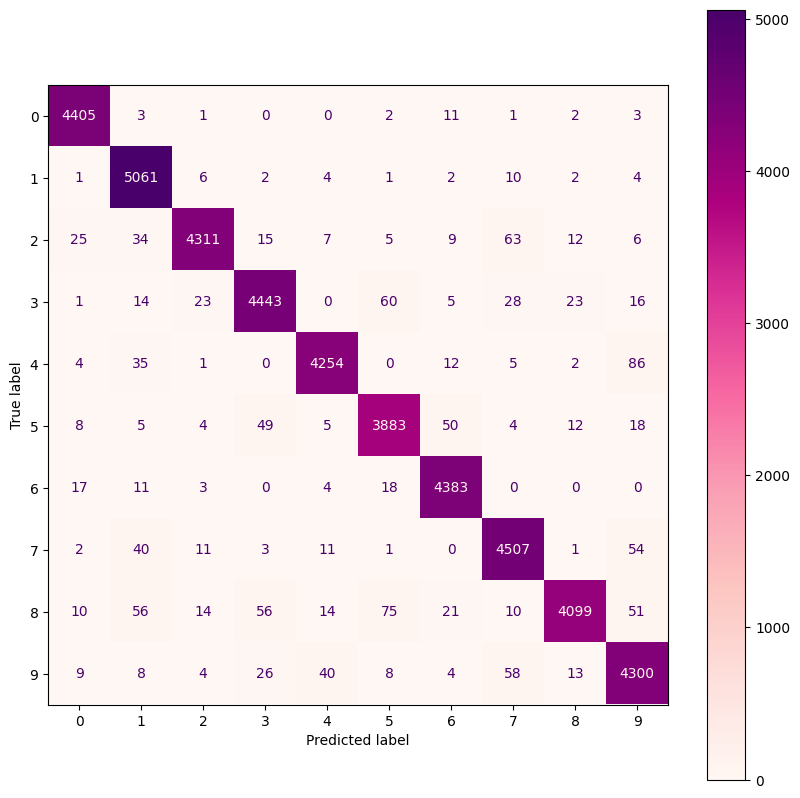

The accuracy for the best model loaded = 0.9692


In [36]:
import joblib

# Save the best model, then reload it in a separate file.
if(Ann_accuracy[1] > Knn_accuracy):
    print("ANN is better.")
    # Get the confusion matrix.
    conf_matrix_ann(ann_best_model)
    ann_best_model.save('best_model.h5')
    best_model_loaded = keras.models.load_model('best_model.h5')
    
else:
    print("KNN is better.")
    # Get the confusion matrix.
    conf_matrix_knn()
    joblib.dump(Best_KNN_Model, 'best_knn_model.joblib')
    best_model_loaded = joblib.load('best_knn_model.joblib')
    
    
y_pred = best_model_loaded.predict(test_features)
accuracy=accuracy_score(y_pred, test_labels)
print("The accuracy for the best model loaded =", accuracy)
